# ECON 206 Final Project Code Part

1. Simulate the 8 factors randomly for 0 to 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# set random 0-1 of all the eight factors
N = 10

player = []
TP_all = []
RA_all = []
EC_all = []
TP_all = []
A_all = []
SN_all = []
CP_all = []
CC_all = []
EA_all = []
for i in range(N):
    RA = np.random.rand(1)
    EC = -np.random.rand(1)
    TP = np.random.rand(1)
    A = np.random.rand(1)
    SN = -np.random.rand(1)
    CP = np.random.rand(1)
    CC = -np.random.rand(1)
    EA = -np.random.rand(1)
    player.append([RA, EC, TP, A, EA, SN, CP, CC])
    TP_all.append(TP)
    RA_all.append(RA)
    EC_all.append(EC)
    A_all.append(A)
    EA_all.append(EA)
    SN_all.append(SN)
    CP_all.append(CP)
    CC_all.append(CC)
# sum each 8 factors in player
player = np.array(player)
alpha = player.sum(axis=1)
# PI larger, choose the same strategies with others more
PI = np.random.rand(1)
alpha = alpha.flatten()

2. Set the payoff matrix of each person

In [3]:
# normalize alpha to 0 -1
alpha = (alpha - alpha.min()) / (alpha.max() - alpha.min())
envi_tree_all = []
econ_crop_all = []
for i in range(N):
    t = TP_all[i]*10
    econ_tree = 0.5
    envi_tree = 0.8546*t-4.7097
    econ_crop = int(t)*104/360
    envi_crop = -1.5
    envi_tree_all.append(envi_tree)
    econ_crop_all.append(econ_crop)
    

3. Use the PULP packages to calculate the objective function, where we need maximum the sum of economic profit and environmental profit simultaneously.


In [6]:
# !pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 49.9 MB/s eta 0:00:00


In [7]:
from pulp import *
import numpy as np

# Assuming you have defined the required variables: N, econ_tree, econ_crop_all, envi_tree_all, envi_crop, and alpha

# Create the LP problem
problem_emotional = LpProblem("Multi-Objective Problem", LpMaximize)

# Decision variables
x = LpVariable.dicts("x", range(N), lowBound=0, upBound=1, cat=LpInteger)

# # Objective functions
objective = LpAffineExpression()


for i in range(N):
    objective += alpha[i] * (x[i] * econ_tree + (1 - x[i]) * econ_crop_all[i])+ \
    ((1 - alpha[0]) * (x[0] * envi_tree_all[0] + (1 - x[0]) * envi_crop)+ \
        (1 - alpha[1]) * (x[1] * envi_tree_all[1] + (1 - x[1]) * envi_crop)+ \
            (1 - alpha[2]) * (x[2] * envi_tree_all[2] + (1 - x[2]) * envi_crop)+\
                (1 - alpha[3]) * (x[3] * envi_tree_all[3] + (1 - x[3]) * envi_crop)+\
                    (1 - alpha[4]) * (x[4] * envi_tree_all[4] + (1 - x[4]) * envi_crop)+\
                        (1 - alpha[5]) * (x[5] * envi_tree_all[5] + (1 - x[5]) * envi_crop)+\
                            (1 - alpha[6]) * (x[6] * envi_tree_all[6] + (1 - x[6]) * envi_crop)+\
                                (1 - alpha[7]) * (x[7] * envi_tree_all[7] + (1 - x[7]) * envi_crop)+\
                                    (1 - alpha[8]) * (x[8] * envi_tree_all[8] + (1 - x[8]) * envi_crop)+\
                                        (1 - alpha[9]) * (x[9] * envi_tree_all[9] + (1 - x[9]) * envi_crop))/N

problem_emotional += objective

# Solve the problem
problem_emotional.solve()

# Print the optimal solution
if problem_emotional.status == LpStatusOptimal:
    print("Optimal Solution:")
    for var in problem_emotional.variables():
        print(f"{var.name} = {var.varValue}")
else:
    print("No optimal solution found.")


Optimal Solution:
x_0 = 1.0
x_1 = 0.0
x_2 = 1.0
x_3 = 0.0
x_4 = 1.0
x_5 = 0.0
x_6 = 1.0
x_7 = 0.0
x_8 = 0.0
x_9 = 0.0


/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [8]:
# check the objective function
objective

[0.41033112]*x_0 + [-0.93888275]*x_1 + [0.22582097]*x_2 + [-1.79132199]*x_3 + [1.34476445]*x_4 + [-1.21627155]*x_5 + [4.10748251]*x_6 + -2.1*x_7 + [-0.25449455]*x_8 + [-1.74297791]*x_9 + [-0.17365311]

4. Use the solution from PULP to calculate the payoff of each players and combine all the data into a dataframe

In [ ]:
TP_all = np.array(TP_all).flatten()
RA_all = np.array(RA_all).flatten()
EC_all = np.array(EC_all).flatten()
TP_all = np.array(TP_all).flatten()
A_all = np.array(A_all).flatten()
EA_all = np.array(EA_all).flatten()
SN_all = np.array(SN_all).flatten()
CP_all = np.array(CP_all).flatten()
CC_all = np.array(CC_all).flatten()
alpha = np.array(alpha).flatten()
x = np.array([var.varValue for var in problem_emotional.variables()]).flatten()
#create dataframe include TP_all, RA_all, EC_all, TP_all, A_all, SN_all, CP_all, CC_all, alpha, x
df = pd.DataFrame({'TP_all':TP_all, 'RA_all':RA_all, 'EC_all':EC_all, 'TP_all':TP_all, 'A_all':A_all, 'EA_all': EA_all,'SN_all':SN_all, 'CP_all':CP_all, 'CC_all':CC_all, 'alpha':alpha, 'x_irrational':x})
#calculate each objective function for player
obj = []
for i in range(N):
    obj_cal = df['alpha'][i] * (x[i] * econ_tree + (1 - x[i]) * econ_crop_all[i])+ \
    ((1 - df['alpha'][0]) * (x[0] * envi_tree_all[0] + (1 - x[0]) * envi_crop)+ \
        (1 - df['alpha'][1]) * (x[1] * envi_tree_all[1] + (1 - x[1]) * envi_crop)+ \
            (1 - df['alpha'][2]) * (x[2] * envi_tree_all[2] + (1 - x[2]) * envi_crop)+\
                (1 - df['alpha'][3]) * (x[3] * envi_tree_all[3] + (1 - x[3]) * envi_crop)+\
                    (1 - df['alpha'][4]) * (x[4] * envi_tree_all[4] + (1 - x[4]) * envi_crop)+\
                        (1 - df['alpha'][5]) * (x[5] * envi_tree_all[5] + (1 - x[5]) * envi_crop)+\
                            (1 - df['alpha'][6]) * (x[6] * envi_tree_all[6] + (1 - x[6]) * envi_crop)+\
                                (1 - df['alpha'][7]) * (x[7] * envi_tree_all[7] + (1 - x[7]) * envi_crop)+\
                                    (1 - df['alpha'][8]) * (x[8] * envi_tree_all[8] + (1 - x[8]) * envi_crop)+\
                                        (1 - df['alpha'][9]) * (x[9] * envi_tree_all[9] + (1 - x[9]) * envi_crop))/N
    obj.append(obj_cal)
obj = np.array(obj).flatten()
# add obj to the df
df['obj_irrational'] = obj
df.head()

,TP_all,RA_all,EC_all,A_all,EA_all,SN_all,CP_all,CC_all,alpha,x_irrational,obj_irrational
0,0.137050,0.726963,-0.235763,0.322063,-0.700025,-0.614245,0.103152,-0.046904,0.314235,0.0,-0.694483
1,0.313192,0.962008,-0.967499,0.395290,-0.355708,-0.638895,0.822153,-0.439468,0.473789,0.0,-0.374645
2,0.148616,0.522456,-0.138123,0.093193,-0.384251,-0.688874,0.928571,-0.845779,0.291636,0.0,-0.701012
3,0.305476,0.461852,-0.868767,0.248509,-0.477359,-0.236230,0.264290,-0.571640,0.087711,0.0,-0.709246
4,0.056037,0.768503,-0.924568,0.215520,-0.143411,-0.311860,0.032754,-0.786065,0.000000,0.0,-0.785262


5. Do the same thing only change the alpha, which means this is the rational choice for each players

In [ ]:
from pulp import *
import numpy as np

# Assuming you have defined the required variables: N, econ_tree, econ_crop_all, envi_tree_all, envi_crop, and alpha

# Create the LP problem
problem_nash = LpProblem("Multi-Objective Problem", LpMaximize)

# Decision variables
x = LpVariable.dicts("x", range(N), lowBound=0, upBound=1, cat=LpInteger)
objective = LpAffineExpression()


for i in range(N):
    # objective += 0.5 * (x[i] * econ_tree + (1 - x[i]) * econ_crop_all[i]) + (1 - 0.5) * (x[i] * envi_tree_all[i] + (1 - x[i]) * envi_crop)
    alpha_ir = [0.5 for i in range(N)]
    objective += alpha_ir[i] * (x[i] * econ_tree + (1 - x[i]) * econ_crop_all[i])+ \
    ((1 - alpha_ir[0]) * (x[0] * envi_tree_all[0] + (1 - x[0]) * envi_crop)+ \
        (1 - alpha_ir[1]) * (x[1] * envi_tree_all[1] + (1 - x[1]) * envi_crop)+ \
            (1 - alpha_ir[2]) * (x[2] * envi_tree_all[2] + (1 - x[2]) * envi_crop)+\
                (1 - alpha_ir[3]) * (x[3] * envi_tree_all[3] + (1 - x[3]) * envi_crop)+\
                    (1 - alpha_ir[4]) * (x[4] * envi_tree_all[4] + (1 - x[4]) * envi_crop)+\
                        (1 - alpha_ir[5]) * (x[5] * envi_tree_all[5] + (1 - x[5]) * envi_crop)+\
                            (1 - alpha_ir[6]) * (x[6] * envi_tree_all[6] + (1 - x[6]) * envi_crop)+\
                                (1 - alpha_ir[7]) * (x[7] * envi_tree_all[7] + (1 - x[7]) * envi_crop)+\
                                    (1 - alpha_ir[8]) * (x[8] * envi_tree_all[8] + (1 - x[8]) * envi_crop)+\
                                        (1 - alpha_ir[9]) * (x[9] * envi_tree_all[9] + (1 - x[9]) * envi_crop))/N

problem_nash += objective

# Solve the problem
problem_nash.solve()

# Print the optimal solution
if problem_nash.status == LpStatusOptimal:
    print("Optimal Solution:")
    for var in problem_nash.variables():
        print(f"{var.name} = {var.varValue}")
else:
    print("No optimal solution found.")
x = np.array([var.varValue for var in problem_nash.variables()]).flatten()

Optimal Solution:
x_0 = 0.0
x_1 = 0.0
x_2 = 0.0
x_3 = 0.0
x_4 = 0.0
x_5 = 0.0
x_6 = 0.0
x_7 = 1.0
x_8 = 0.0
x_9 = 1.0


/Users/YiZhiYuanYuan/miniforge3/lib/python3.9/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


6. Calculate the payoff under the situation of alpha = 0.5

In [ ]:
#calculate each objective function for player
obj_nash = []
for i in range(N):
    obj_cal = alpha_ir[i] * (x[i] * econ_tree + (1 - x[i]) * econ_crop_all[i])+ \
    ((1 - alpha_ir[0]) * (x[0] * envi_tree_all[0] + (1 - x[0]) * envi_crop)+ \
        (1 - alpha_ir[1]) * (x[1] * envi_tree_all[1] + (1 - x[1]) * envi_crop)+ \
            (1 - alpha_ir[2]) * (x[2] * envi_tree_all[2] + (1 - x[2]) * envi_crop)+\
                (1 - alpha_ir[3]) * (x[3] * envi_tree_all[3] + (1 - x[3]) * envi_crop)+\
                    (1 - alpha_ir[4]) * (x[4] * envi_tree_all[4] + (1 - x[4]) * envi_crop)+\
                        (1 - alpha_ir[5]) * (x[5] * envi_tree_all[5] + (1 - x[5]) * envi_crop)+\
                            (1 - alpha_ir[6]) * (x[6] * envi_tree_all[6] + (1 - x[6]) * envi_crop)+\
                                (1 - alpha_ir[7]) * (x[7] * envi_tree_all[7] + (1 - x[7]) * envi_crop)+\
                                    (1 - alpha_ir[8]) * (x[8] * envi_tree_all[8] + (1 - x[8]) * envi_crop)+\
                                        (1 - alpha_ir[9]) * (x[9] * envi_tree_all[9] + (1 - x[9]) * envi_crop))/N
    obj_nash.append(obj_cal)
obj_nash = np.array(obj_nash).flatten()
df['x_rational'] = x
df['obj_rational'] = obj_nash
# df1 = pd.DataFrame({'x':x,'obj':obj})
df

,TP_all,RA_all,EC_all,A_all,EA_all,SN_all,CP_all,CC_all,alpha,x_irrational,obj_irrational,x_rational,obj_rational
0,0.137050,0.726963,-0.235763,0.322063,-0.700025,-0.614245,0.103152,-0.046904,0.314235,0.0,-0.694483,0.0,-0.298035
1,0.313192,0.962008,-0.967499,0.395290,-0.355708,-0.638895,0.822153,-0.439468,0.473789,0.0,-0.374645,0.0,-0.009146
2,0.148616,0.522456,-0.138123,0.093193,-0.384251,-0.688874,0.928571,-0.845779,0.291636,0.0,-0.701012,0.0,-0.298035
3,0.305476,0.461852,-0.868767,0.248509,-0.477359,-0.236230,0.264290,-0.571640,0.087711,0.0,-0.709246,0.0,-0.009146
4,0.056037,0.768503,-0.924568,0.215520,-0.143411,-0.311860,0.032754,-0.786065,0.000000,0.0,-0.785262,0.0,-0.442479
5,0.259743,0.690802,-0.526562,0.763697,-0.743338,-0.313795,0.268192,-0.201032,0.516454,0.0,-0.486866,0.0,-0.153590
6,0.102006,0.604161,-0.989339,0.070458,-0.348087,-0.374478,0.028674,-0.110064,0.030577,0.0,-0.776429,0.0,-0.298035
7,0.619952,0.381433,-0.428953,0.270962,-0.023259,-0.600950,0.313185,-0.738490,0.354881,1.0,-0.607821,1.0,-0.192479
8,0.358240,0.487534,-0.039798,0.723344,-0.078541,-0.999965,0.502852,-0.053636,0.797457,0.0,-0.094132,0.0,-0.009146
9,0.850890,0.616714,-0.866532,0.917411,-0.079762,-0.358110,0.981467,-0.655824,1.000000,0.0,1.525849,1.0,-0.192479


7. Simulate the factors randomly and draw the payoff of rational and irrational situations to make the comparison.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


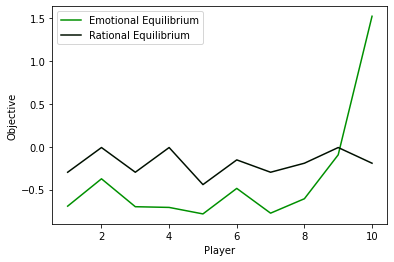

In [ ]:
# simulate random x
# using the random x calculate obj
simu = []
simu_sum = []
for j in range(100):
    x_random = np.random.randint(0,2,N)
    obj_random = []
    for i in range(N):
        obj_cal = alpha[i] * (x_random[i] * econ_tree + (1 - x_random[i]) * econ_crop_all[i])+ \
    ((1 - alpha[0]) * (x_random[0] * envi_tree_all[0] + (1 - x_random[0]) * envi_crop)+ \
        (1 - alpha[1]) * (x_random[1] * envi_tree_all[1] + (1 - x_random[1]) * envi_crop)+ \
            (1 - alpha[2]) * (x_random[2] * envi_tree_all[2] + (1 - x_random[2]) * envi_crop)+\
                (1 - alpha[3]) * (x_random[3] * envi_tree_all[3] + (1 - x_random[3]) * envi_crop)+\
                    (1 - alpha[4]) * (x_random[4] * envi_tree_all[4] + (1 - x_random[4]) * envi_crop)+\
                        (1 - alpha[5]) * (x_random[5] * envi_tree_all[5] + (1 - x_random[5]) * envi_crop)+\
                            (1 - alpha[6]) * (x_random[6] * envi_tree_all[6] + (1 - x_random[6]) * envi_crop)+\
                                (1 - alpha[7]) * (x_random[7] * envi_tree_all[7] + (1 - x_random[7]) * envi_crop)+\
                                    (1 - alpha[8]) * (x_random[8] * envi_tree_all[8] + (1 - x_random[8]) * envi_crop)+\
                                        (1 - alpha[9]) * (x_random[9] * envi_tree_all[9] + (1 - x_random[9]) * envi_crop))/N
        obj_random.append(obj_cal)

    obj_random = np.array(obj_random).flatten()
    # draw plot widgth 10, height 10
   
    # draw obj_random scatter plot with blue color,x-axis is 1-10, y-axis is obj_random
    # plt.plot(range(1,N+1), obj_random, color='blue')
    simu.append(obj_random)
    simu_sum.append(sum(obj_random))
obj_random
# draw obj scatter plot with red color,x-axis is 1-10, y-axis is obj

# add label of the plot
plt.xlabel('Player')
plt.ylabel('Objective')
# add lable of the red and yellow line
plt.plot(range(1,N+1), df['obj_irrational'], color='#009000',label='Emotional Equilibrium')
plt.plot(range(1,N+1), df['obj_rational'], color='#001000',label='Rational Equilibrium')
plt.legend()
plt.savefig('obj.eps', dpi=300)
plt.show()



